# Preprocess HSC dataset

In [1]:
import dynamo as dyn
import pandas as pd
import numpy as np
import scipy
import scanpy as sc

import warnings
warnings.filterwarnings('ignore')

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


|-----> setting visualization default mode in dynamo. Your customized matplotlib settings might be overritten.


/Users/random/opt/anaconda3/envs/dynamo-dev/lib/python3.9/site-packages/nxviz/__init__.py:18: UserWarning: 
nxviz has a new API! Version 0.7.3 onwards, the old class-based API is being
deprecated in favour of a new API focused on advancing a grammar of network
graphics. If your plotting code depends on the old API, please consider
pinning nxviz at version 0.7.3, as the new API will break your old code.

To check out the new API, please head over to the docs at
https://ericmjl.github.io/nxviz/ to learn more. We hope you enjoy using it!

(This deprecation message will go away in version 1.0.)

  warnings.warn(


In [2]:
# JL_12_1_full = dyn.read('/lab/solexa_weissman/xqiu/proj/Aristotle/data/revision1/hsc/novaseq_sp_6_30/all_tags/count/adata.h5ad')
# adata_dyn = dyn.read('./adata_dyn.h5ad')
adata_dyn = dyn.read('./hsc_all_combined_all_layers.h5ad')
adata_dyn

AnnData object with n_obs × n_vars = 2019 × 26193
    obs: 'batch'
    var: 'gene_name'
    layers: 'X_l_TC', 'X_n_TC', 'ambiguous', 'labeled_TC', 'sl_TC', 'sn_TC', 'spliced', 'total', 'ul_TC', 'un_TC', 'unlabeled_TC', 'unspliced'

In [3]:
# adata_filtered = dyn.read('./adata_filtered_hsc.h5ad')
# adata_filtered = dyn.read('./hsc_adata_filtered2.h5ad')

# adata_filtered


In [4]:

# klein_hsc_sc_analysis = dyn.read('./klein_hsc_sc_analysis.h5ad')

# JL10_full = dyn.read('../nova_seq_7_15/all_tags/count_JL10_with_barcodes/adata.h5ad')
# JL10_ntsu = dyn.read('./JL10_adata.h5ad')

# JL12_2_full = dyn.read('../nova_seq_7_15/all_tags/count_JL12_with_barcodes/adata.h5ad')
# JL12_2_ntsu = dyn.read('./JL12_2_filtered.h5ad')

# # klein_hsc_sc_analysis.shape, 
# JL10_full.shape, JL10_ntsu.shape, JL12_2_full.shape, JL12_2_ntsu.shape, adata_dyn.shape

|-----> Downloading processed hematopoiesis adata
|-----> Downloading data to ./data/hematopoiesis.h5ad
|-----------> plotting with basis key=X_umap
|-----------> skip filtering batch by stack threshold when stacking color because it is not a numeric type


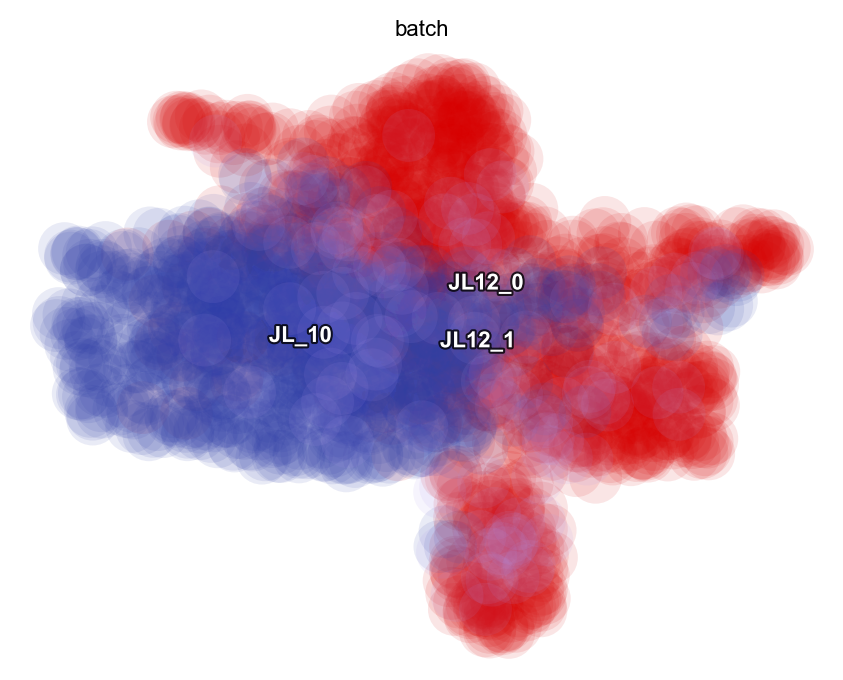

In [5]:
# adata_filtered2_processed = dyn.read('./hsc_adata_filtered2.h5ad')
adata_filtered2_processed = dyn.sample_data.hematopoiesis()
dyn.pl.scatters(adata_filtered2_processed, color='batch', basis="umap")

In [6]:
adata_filtered2_processed.shape

(1947, 1956)

In [7]:
adata_dyn = dyn.read('./hsc_all_combined_all_layers.h5ad')

adata_dyn

AnnData object with n_obs × n_vars = 2019 × 26193
    obs: 'batch'
    var: 'gene_name'
    layers: 'X_l_TC', 'X_n_TC', 'ambiguous', 'labeled_TC', 'sl_TC', 'sn_TC', 'spliced', 'total', 'ul_TC', 'un_TC', 'unlabeled_TC', 'unspliced'

In [8]:
adata_dyn.obs['time'] = 3
adata_dyn.obs.loc[adata_dyn.obs.batch == 'JL_10', 'time'] = 5
adata_dyn.obs.time.value_counts()

adata_dyn

AnnData object with n_obs × n_vars = 2019 × 26193
    obs: 'batch', 'time'
    var: 'gene_name'
    layers: 'X_l_TC', 'X_n_TC', 'ambiguous', 'labeled_TC', 'sl_TC', 'sn_TC', 'spliced', 'total', 'ul_TC', 'un_TC', 'unlabeled_TC', 'unspliced'

OMP: Info #273: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


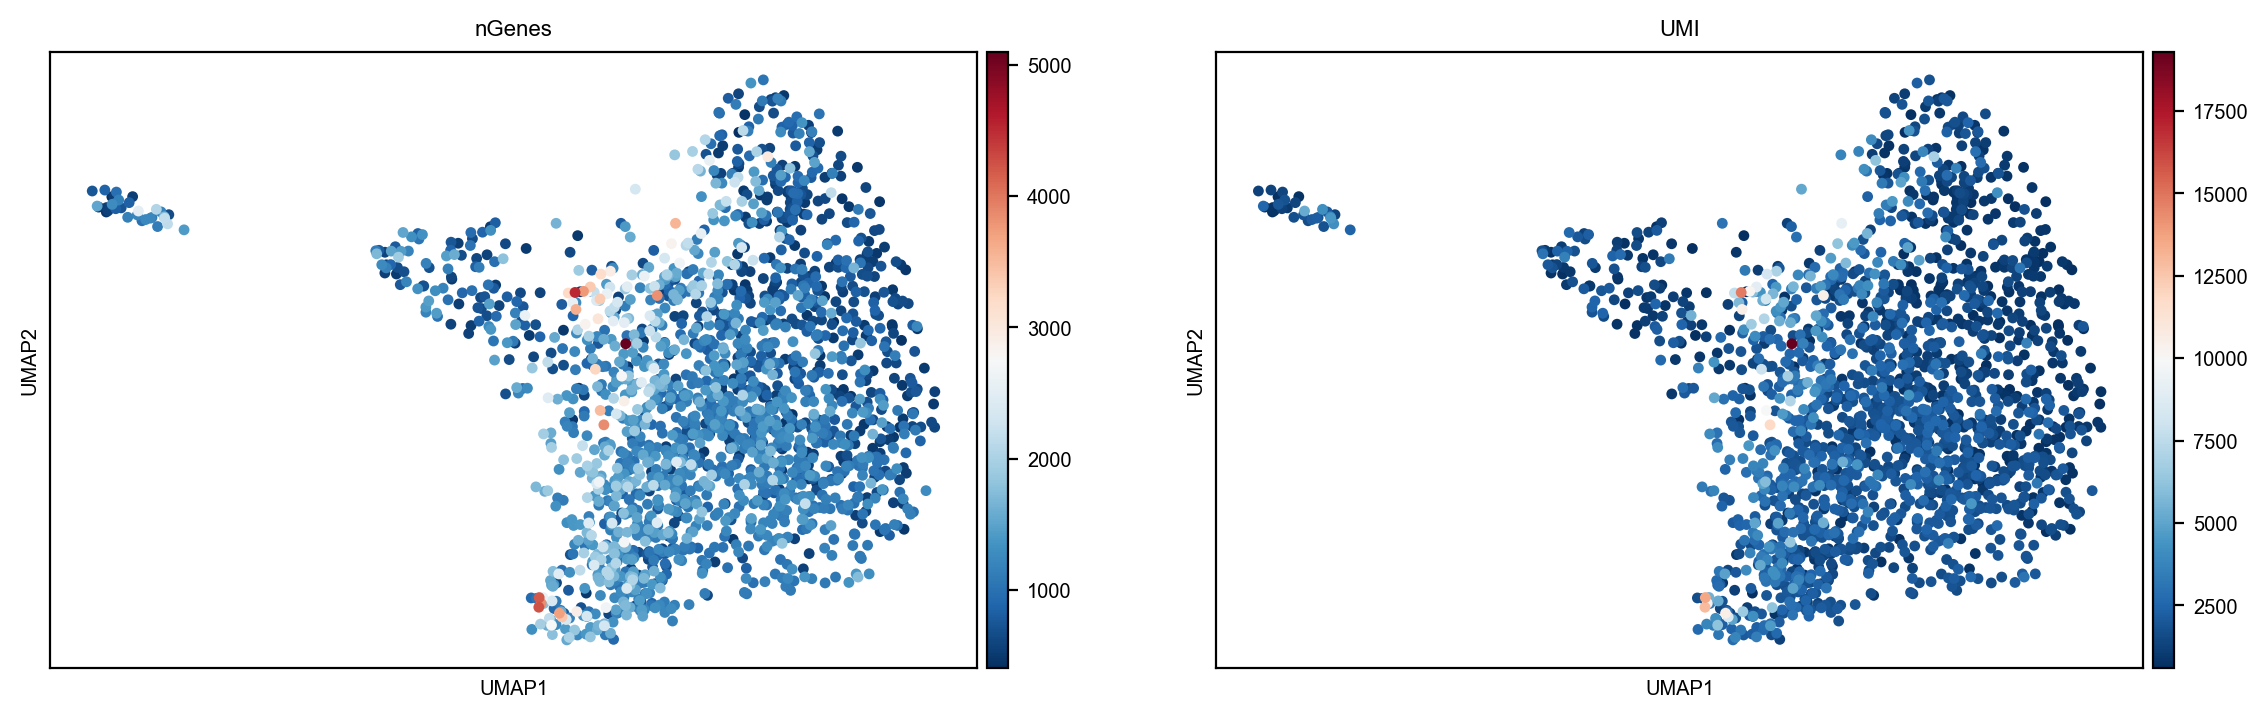

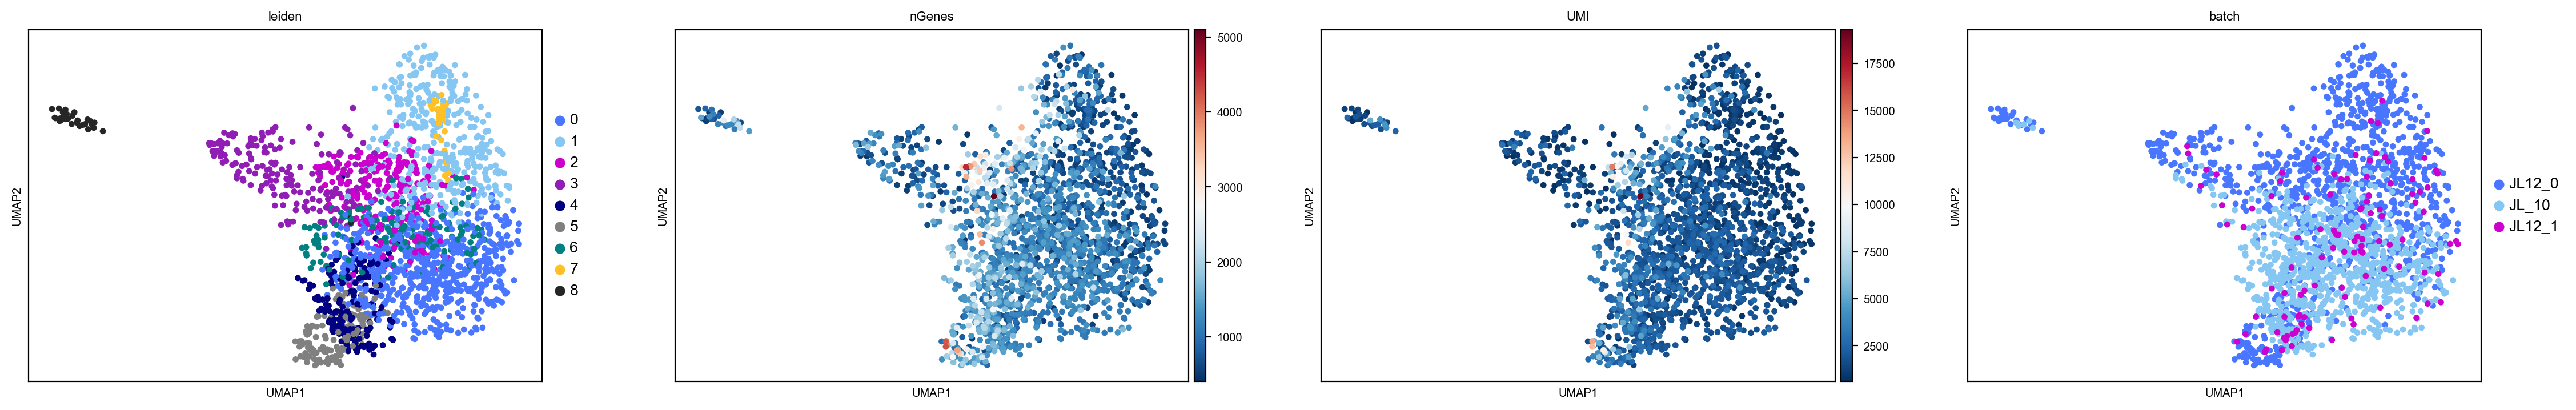

In [9]:
adata_dyn.obs_names_make_unique()
adata_filtered2 = adata_dyn.copy()
adata_filtered2.obs["nGenes"] = (adata_filtered2.X > 0).sum(1)
adata_filtered2.obs["UMI"] = (adata_filtered2.X).sum(1)

adata_filtered2.X = adata_filtered2.layers['labeled_TC'].copy()
adata_filtered2.X[adata_filtered2.obs.batch == 'JL_10', :] *= 3/5 

# TODO: try dynamo's seurat preprocess recipe
# TODO: replace sc with dyn functions
sc.pp.recipe_seurat(adata_filtered2)

# sc.pp.normalize_per_cell(adata_filtered2)
# sc.pp.log1p(adata_filtered2)
# sc.pp.scale(adata_filtered2)                              # scale to unit variance and shift to zero mean
sc.tl.pca(adata_filtered2, n_comps=50)

sc.pp.neighbors(adata_filtered2, n_neighbors=30, random_state=1, n_pcs=10)

sc.tl.leiden(adata_filtered2, resolution=0.5)

# TODO: choose based on results: n_components=2 or 3


sc.tl.umap(adata_filtered2, random_state=1, n_components=3)

sc.pl.umap(adata_filtered2, color=['nGenes', 'UMI'])

adata_filtered2.obs.UMI.median(), adata_filtered2.obs.nGenes.median()

adata_filtered2

# plot results
sc.pl.umap(
    adata_filtered2,
    color=[
        "leiden",
        'nGenes', 
        'UMI',
        'batch',
    ],
    legend_fontsize="large",
    ncols=4,
)

# Vijay_genes = ["GFI1", "RUNX1", "IRF4", "IRF8", "SPI1", 'MPO']

# chen_paper_genes = ['PLEK', 'HBB', 'MPO', 'SPIB', 'CD79A', 'DNTT', 'CD34', 'CD164', 'LMO4', 'PF4', "LYZ", "PLEK", "MPO", "LMO4", "HBB"] + paul_Ery + Er
# sc.pl.umap(
#     adata_filtered2,
#     color=adata_filtered2.var_names.intersection(chen_paper_genes + Vijay_genes + ['leiden']),
#     ncols=4,
# )

# adata_filtered2.write_h5ad("hsc_adata_filtered2.h5ad")

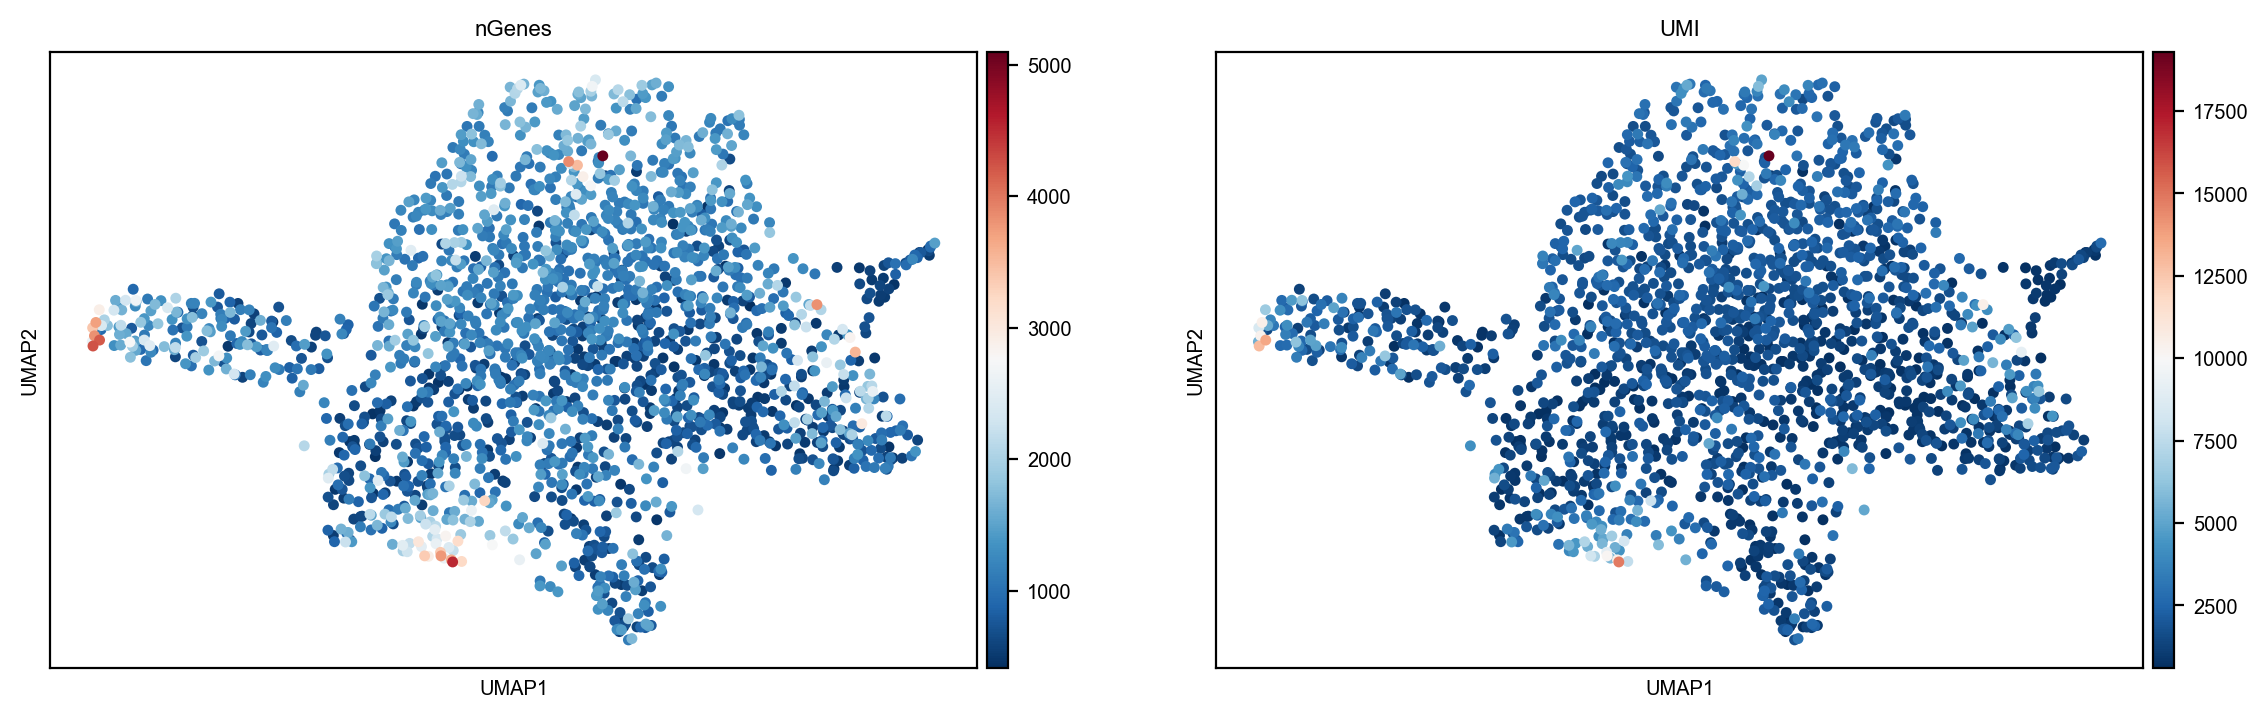

In [10]:
adata_filtered2 = adata_filtered2[~ adata_filtered2.obs.leiden.isin(["8"])]


sc.tl.umap(adata_filtered2, random_state=1, n_components=2)

sc.pl.umap(adata_filtered2, color=['nGenes', 'UMI'])

# adata_filtered2.write_h5ad("hsc_adata_filtered2.h5ad")

In [11]:
mapping_points  = adata_filtered2.obsm["X_umap"]

true_points  = adata_filtered2_processed.obsm["X_umap"]

In [12]:
mapping_points.shape, true_points.shape

((1945, 2), (1947, 2))

In [13]:
np.zeros(mapping_points.shape[0])

array([0., 0., 0., ..., 0., 0., 0.])

In [14]:
mapping_points = np.hstack([mapping_points, np.zeros(mapping_points.shape[0]).reshape(-1, 1)])

In [15]:
true_points = np.hstack([true_points, np.zeros(true_points.shape[0]).reshape(-1, 1)])

In [16]:
def kabsch_umeyama(A, B):
    assert A.shape == B.shape
    n, m = A.shape

    EA = np.mean(A, axis=0)
    EB = np.mean(B, axis=0)
    VarA = np.mean(np.linalg.norm(A - EA, axis=1) ** 2)

    H = ((A - EA).T @ (B - EB)) / n
    U, D, VT = np.linalg.svd(H)
    d = np.sign(np.linalg.det(U) * np.linalg.det(VT))
    S = np.diag([1] * (m - 1) + [d])

    R = U @ S @ VT
    c = VarA / np.trace(np.diag(D) @ S)
    t = EA - c * R @ EB

    return R, c, t

In [17]:
adata_filtered2.shape, adata_filtered2_processed.shape

((1945, 2477), (1947, 1956))

In [18]:
umap_transform.shape, mapping_points.shape

NameError: name 'umap_transform' is not defined

In [ ]:
# umap_transform = np.zeros_like(mapping_points)

# for i in np.arange(umap_transform.shape[0]):
#     umap_transform[i] = np.matmul(r, mapping_points[i])


In [ ]:
# R, c, t = kabsch_umeyama(true_points, mapping_points)
R = np.array([[-0.81034281,  0.58595608],
     [-0.58595608, -0.81034281]])
c = 1.46166131
t = [271.3345951, 396.07800317]

mapping_points  = adata_filtered2.obsm["X_umap"]

umap_transform = np.array([t + c * R @ b for b in mapping_points[:, :2]])

In [ ]:
R, c, t

In [ ]:
np.degrees(np.arccos(0.17502)), np.degrees(np.arcsin(0.98456364)) # , np.degrees(np.arccos(0.17502)), np.degrees(np.arccos(0.17502))

In [ ]:
dyn.pl.scatters(adata_filtered2_processed, color=['cell_type', 'UMI'], basis='umap', affine_transform_degree=50)

In [ ]:
adata_filtered2.obsm['X_umap_transform'] = umap_transform[:, :2]

dyn.pl.scatters(adata_filtered2, color=['nGenes', 'UMI'], basis='umap_transform')

In [ ]:
adata_filtered2.obsm['X_umap'] = adata_filtered2_processed.obsm['X_umap'].copy()

In [ ]:
import pickle 

union_genes = pickle.load(open('./union_genes.p', 'rb'))
# union_genes

In [ ]:
adata_dyn.obs['time'] = 3
adata_dyn.obs.loc[adata_dyn.obs.batch == 'JL_10', 'time'] = 5
adata_labeling = adata_dyn[adata_filtered2.obs_names]

adata_labeling.X = adata_labeling.layers['total'].copy()
adata_labeling.layers['new'] = adata_labeling.layers['labeled_TC'].copy()

layers_keys = adata_labeling.layers.keys()
for i in ['X_l_TC', 'X_n_TC', 'ambiguous', 'labeled_TC', 'sl_TC', 'sn_TC', 'ul_TC', 'un_TC', 'unlabeled_TC', 'spliced', 'unspliced']:
    if i in layers_keys: del adata_labeling.layers[i]

dyn.pp.recipe_monocle(adata_labeling,
                      tkey='time',
                      experiment_type='one-shot',
                      genes_to_use=union_genes,
                      n_top_genes=len(union_genes),
                      feature_selection_layer='new',
                     )

dyn.tl.dynamics(adata_labeling, group='time' , one_shot_method='sci_fate', model='deterministic')
dyn.tl.reduceDimension(adata_labeling) 
dyn.tl.leiden(adata_labeling)
dyn.tl.cell_velocities(adata_labeling,
                       X=adata_labeling.layers['M_t'],
                       V=adata_labeling.layers['velocity_T'],
                       enforce=True,
                       method='cosine',
                       )

dyn.pl.streamline_plot(
    adata_labeling,
    color=['batch'] + list(adata_dyn.var_names.intersection(chen_paper_genes)),
    ncols=4,
    basis='umap',
    show_legend='best'
)

In [ ]:
adata_labeling.obsm['X_umap'] = adata_filtered2.obsm['X_umap'].copy()

In [ ]:
dynamo_revision_genes = ["LYZ", "PLEK", "MPO", "LMO4", "HBB"]

adata_labeling.obsm['X_pca'] = adata_filtered2.obsm['X_pca'].copy()
dyn.tl.leiden(adata_labeling, obsm_key='X_umap', result_key='umap_leiden')
dyn.tl.leiden(adata_labeling, obsm_key='X_pca')
dyn.pl.scatters(adata_labeling, color=['umap_leiden', 'batch', 'leiden'] + list(adata_dyn.var_names.intersection(dynamo_revision_genes)))

In [ ]:
dyn.tl.neighbors(adata_labeling, basis='umap')

In [ ]:
dyn.tl.louvain(adata_labeling, obsm_key='X_umap', result_key='umap_louvain', adj_matrix_key='X_umap_connectivities')
dyn.pl.scatters(adata_labeling, color=['umap_leiden', 'batch', 'umap_louvain'] + list(adata_dyn.var_names.intersection(dynamo_revision_genes)))

In [ ]:
dyn.tl.louvain(adata_labeling, obsm_key='X_umap', result_key='umap_louvain', resolution=0.7, adj_matrix=adata_labeling.obsp['X_pca_connectivities'])
dyn.pl.scatters(adata_labeling, color=['batch', 'umap_louvain'])

In [ ]:
adata_labeling.obs['cell_type'] = adata_labeling.obs['umap_louvain'].map({
    "3": "HSC",
    "12": "HSC",
    "7": "GMP",
    "11": "GMP",
    "2": 'MPP',
    "8": "MPP",
    "10": "MPP",
    "9": "Neu",
    "6": "Mon",
    "4": "Mon",
    "0": "Bas",
    "1": "Ery",
    "5": "Meg",
})

dyn.pl.streamline_plot(adata_labeling, color='cell_type')

In [ ]:
################################### Our data ###################################
adata_dyn = dyn.read('./hsc_all_combined_all_layers.h5ad')
adata_filtered2 = dyn.read('./hsc_adata_filtered2.h5ad')
adata_dyn.obs['time'] = 3
adata_dyn.obs.loc[adata_dyn.obs.batch == 'JL_10', 'time'] = 5
adata_labeling = adata_dyn[adata_filtered2.obs_names]

adata_labeling.layers['new'] = adata_labeling.layers['labeled_TC'].copy()

# adata_labeling.X = adata_labeling.layers['labeled_TC'].copy()
# adata_labeling.X[adata_labeling.obs.batch == 'JL_10', :] *= 3/5 

layers_keys = adata_labeling.layers.keys()
for i in ['X_l_TC', 'X_n_TC', 'ambiguous', 'labeled_TC', 'sl_TC', 'sn_TC', 'ul_TC', 'un_TC', 'unlabeled_TC']:
    if i in layers_keys: del adata_labeling.layers[i]

import pickle
union_genes = pickle.load(open('./union_genes.p', 'rb'))

In [ ]:
# ZFPM1: FOG1; EKLF: KLF1; cJun: JUN; EgrNab: NAB2
# ETO2: CBFA2T3; TEL: ETV6 
network_inference_genes = ["GATA2", "GFI1", "GFI1B", "NFE2", "TAL1", "GATA1", "LYL1", "ERG", "FLI1", "MEIS1", "SPI1", "MITF", "LMO2", "LDB1", "RUNX1", "ETV6", "HHEX", "CBFA2T3"]
Krumsiek_11 = ["GATA2", "GATA1", "ZFPM1", "SPI1", "FLI1", "KLF1", "TAL1", "CEBPA", "GFI1", "JUN", "NAB2"]

union_genes += network_inference_genes
union_genes += Krumsiek_11

In [ ]:
len(np.unique(union_genes)), len(union_genes)

In [ ]:
adata_labeling_obs = pd.read_csv('adata_labeling_all_combined_processed_final.csv', index_col=0)

adata_labeling_obs.head()

In [ ]:
adata_labeling.obs['cell_type'] = list(adata_labeling_obs.loc[adata_labeling.obs_names, "cell_type"])

In [ ]:
adata_labeling.obs['cell_type'].unique()

In [ ]:
adata_labeling.obs['cell_type'] = adata_labeling.obs['cell_type'].map({
    "GMP": "GMP-like",
    "MPP": "MEP-like",
    'Mon': "Mon", 
    'Meg': "Meg", 
    'Ery': "Ery", 
    'Bas': "Bas", 
    'HSC': "HSC", 
    'Neu': "Neu"
})

adata_labeling.obs['cell_type'].value_counts()

In [ ]:
adata_labeling

In [ ]:
dyn.pp.recipe_monocle(adata_labeling,
                      tkey='time',
                      experiment_type='one-shot',
                      genes_to_use=union_genes,
                      n_top_genes=len(union_genes), 
                      maintain_n_top_genes=True
                     )
adata_labeling.var.use_for_pca.sum()

In [ ]:
list(set(Krumsiek_11 + network_inference_genes).difference(adata_labeling.var_names[adata_labeling.var.use_for_pca]))

In [ ]:
list(set(Krumsiek_11 + network_inference_genes).intersection(adata_labeling.var_names[adata_labeling.var.use_for_pca]))

In [ ]:
dyn.tl.moments(adata_labeling, group='time')
M_s = adata_labeling.layers['M_s'].copy()
M_u = adata_labeling.layers['M_u'].copy()

# here delete the splicing data
adata_full = adata_labeling.copy()
layers_keys = adata_labeling.layers.keys()
for i in ['spliced', 'unspliced', 'X_spliced', 'X_unspliced',  'M_u', 'M_uu', 'M_s', 'M_us', 'M_t', 'M_tt', 'M_n', 'M_tn', 'M_ss', 'M_nn']:
    if i in layers_keys: del adata_labeling.layers[i]
adata_labeling.uns['pp']
adata_labeling.uns['pp']['has_splicing'] = False

dyn.tl.dynamics(adata_labeling, group='time', one_shot_method='sci_fate', model='deterministic')
dyn.tl.reduceDimension(adata_labeling)
dyn.tl.leiden(adata_labeling)
dyn.tl.cell_velocities(adata_labeling,
                       enforce=True,
                       method='cosine',
                       )

dyn.pl.streamline_plot(
    adata_labeling,
    color=['batch'], #+ list(adata_dyn.var_names.intersection(chen_paper_genes)),
    ncols=4,
    basis='umap',
)

In [ ]:
adata_labeling.uns['pp']

In [ ]:
adata_labeling.obs.time.unique()

In [ ]:
#############################################
# alpha = new / (1 - e^{-rt}) * r
#############################################
new = adata_labeling[:, adata_labeling.var.use_for_pca].layers['M_n']
gamma = adata_labeling[:, adata_labeling.var.use_for_pca].var.gamma
time_3_gamma = adata_labeling[:, adata_labeling.var.use_for_pca].var.time_3_gamma.astype(float)
time_5_gamma = adata_labeling[:, adata_labeling.var.use_for_pca].var.time_5_gamma.astype(float)

t = adata_labeling.obs.time.astype(float)
M_s = M_s[:, adata_labeling.var.use_for_pca]

time_3_cells = adata_labeling.obs.time == 3
time_5_cells = adata_labeling.obs.time == 5

def alpha_minus_gamma_s(new, gamma, t, M_s):
    alpha = new.A.T / (1 - np.exp(- gamma.values[:, None] * t.values[None, :])) * gamma.values[:, None]
    gamma_s = gamma.values[:, None] * M_s.A.T
    alpha_minus_gamma_s = alpha - gamma_s

    return alpha_minus_gamma_s

time_3_tmp = alpha_minus_gamma_s(new[time_3_cells, :], time_3_gamma, t[time_3_cells], M_s[time_3_cells, :])
time_5_tmp = alpha_minus_gamma_s(new[time_5_cells, :], time_5_gamma, t[time_5_cells], M_s[time_5_cells, :])

tmp = adata_labeling.layers['velocity_N'].copy()

valid_tmp = tmp[:, adata_labeling.var.use_for_pca].copy()
valid_tmp[time_3_cells, :] = time_3_tmp.T
valid_tmp[time_5_cells, :] = time_5_tmp.T
tmp[:, adata_labeling.var.use_for_pca] = valid_tmp.copy()

adata_labeling.layers['velocity_alpha_minus_gamma_s'] = tmp.copy()

dyn.tl.cell_velocities(adata_labeling,
                       enforce=True,
                       X=adata_labeling.layers['M_t'],
                       V=adata_labeling.layers['velocity_alpha_minus_gamma_s'],
                       method='cosine',
                       )

chen_paper_genes = ['PLEK', 'HBB', 'MPO', 'SPIB', 'CD79A', 'DNTT', 'CD34', 'CD164', "LMO4", "S100A8", "TGFBI"]
dyn.pl.streamline_plot(
    adata_labeling,
    color=['batch'] + list(adata_dyn.var_names.intersection(chen_paper_genes)),
    ncols=4,
    basis='umap',
)

In [ ]:
adata_labeling.obsm['X_umap_ori'] = adata_filtered2.obsm['X_umap'].copy()

dyn.tl.cell_velocities(adata_labeling,
                       # X=adata_labeling.layers['M_t'],
                       # V=adata_labeling.layers['alpha_minus_gamma_s'],
                       basis='umap_ori',
                       method='cosine',
                       # enforce=True,
                       )

dyn.pl.streamline_plot(
    adata_labeling,
    color=['batch'], #+ list(adata_dyn.var_names.intersection(chen_paper_genes)),
    ncols=4,
    basis='umap_ori',
)